In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt, dates

Imports necessary libraries for data manipulation, analysis, and visualization, including pandas, numpy, datetime, seaborn, and matplotlib.pyplot, along with the dates submodule from matplotlib.

# **1. Ingestion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount Google Drive

In [ ]:
csv_02 = '/content/drive/MyDrive/Colab Notebooks/Capstone/MSN_02_cleaned.csv'
msn_02_no_leak = pd.read_csv(csv_02, delimiter=',')

Reads the CSV file containing cleaned data for MSN_02 into a Pandas DataFrame named msn_02_no_leak.
Assumes that the CSV file has a delimiter (separator) of , (comma).

In [ ]:
msn_02_no_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

Displays the first few rows of the msn_02_no_leak DataFrame to provide a quick overview of its structure and content.

In [ ]:
msn_02_no_leak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224062 entries, 0 to 224061
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   UTC_TIME                        224062 non-null  object 
 1   Flight                          224062 non-null  object 
 2   FLIGHT_PHASE_COUNT              224062 non-null  float64
 3   VALUE_FOB                       224062 non-null  float64
 4   FW_GEO_ALTITUDE                 224062 non-null  float64
 5   ENGINE_RUNNING                  224062 non-null  int64  
 6   TOTAL_FUEL_USED                 224062 non-null  float64
 7   SECONDS_PER_FLIGHT              224062 non-null  float64
 8   TOTAL_SECONDS_PER_FLIGHT        224062 non-null  float64
 9   VALUE_FOB_DIFF                  224062 non-null  float64
 10  TOTAL_FUEL_USED_DIFF            224062 non-null  float64
 11  FUEL_FLOW_AVE                   224062 non-null  float64
 12  Cluster         

Provides information about the msn_02_no_leak DataFrame, including the data types of each column, the number of non-null values, and memory usage.

# **2. msn_02 no leak**

In [ ]:
msn_02_no_leak['cumsum_TOTAL_FUEL_USED_DIFF'] = msn_02_no_leak.groupby('Flight')['TOTAL_FUEL_USED_DIFF'].cumsum()
msn_02_no_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  cumsum_TOTAL_FUEL_USED_DIFF  
0                             0.0                       0.0000  
1                             0.0                       2.0279  
2                             0.0                       4.1823  
3                             0.0                       6.2113  
4                             0.0                       8.4291

This code calculates the cumulative fuel used difference per flight in a Pandas DataFrame.

In [ ]:
msn_02_no_leak['EXP_FOB'] = msn_02_no_leak.groupby('Flight')['VALUE_FOB'].transform('first') - msn_02_no_leak['cumsum_TOTAL_FUEL_USED_DIFF']
msn_02_no_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  cumsum_TOTAL_FUEL_USED_DIFF     EXP_FOB  
0                             0.0                       0.0000  26046.0000  
1                             0.0                       2.0279  26043.9721  
2                             0.0                       4.1823  26041.8177  
3                             0.0                       6.2113  26039.7887  
4                             0.0                       8.4291  26037.5709

Calculates the expected fuel on board (EXP_FOB) for each flight in a Pandas DataFrame by subtracting the cumulative fuel used difference from the first fuel value per flight.

In [ ]:
flight_values = msn_02_no_leak['Flight'].unique()
print(flight_values)

['V0136' 'V0133' 'V0926' 'V0837' 'V0626' 'V0929' 'V0095' 'V0623' 'V0965'
 'V0344' 'V0346' 'V0835' 'V0624' 'V0097' 'V0962' 'V0098' 'V0134' 'V0889'
 'V0348' 'V0140' 'V0135' 'V0099' 'V0925' 'V0834' 'V0625' 'V0963' 'V0966'
 'V0833' 'V0622' 'V0964' 'V0884' 'V0138' 'V0345' 'V0836' 'V0928' 'V0094'
 'V0927' 'V0137']


Snippet extracts and displays all unique flight identifiers from the 'Flight' column in the Pandas DataFrame msn_02_no_leak.

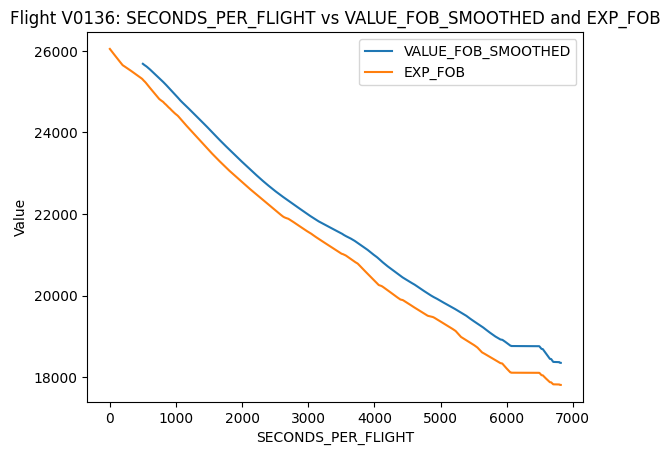

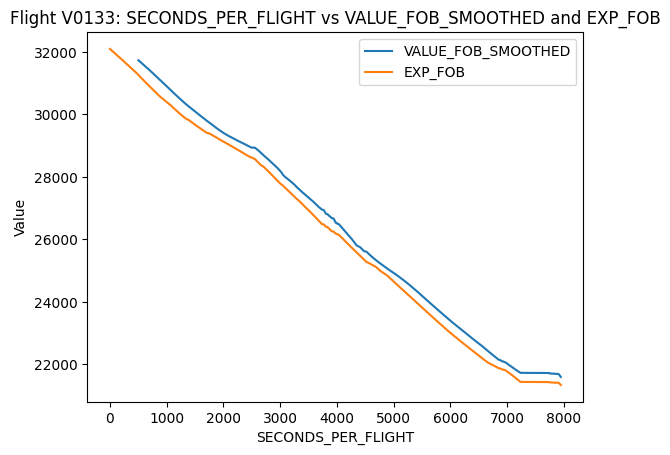

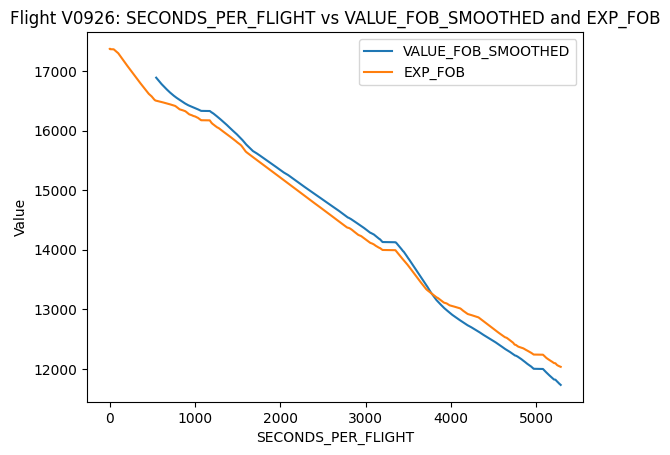

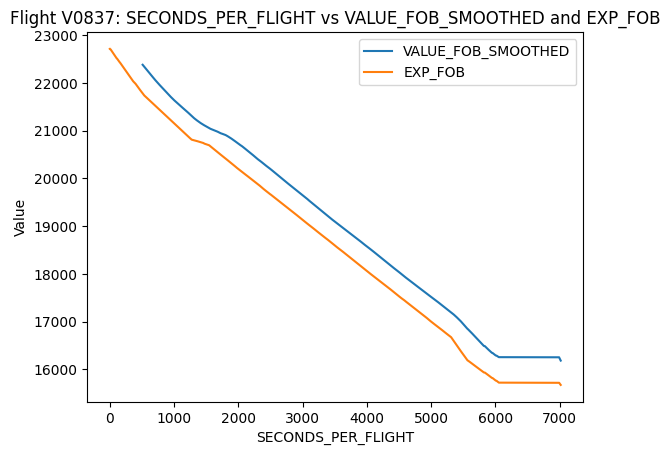

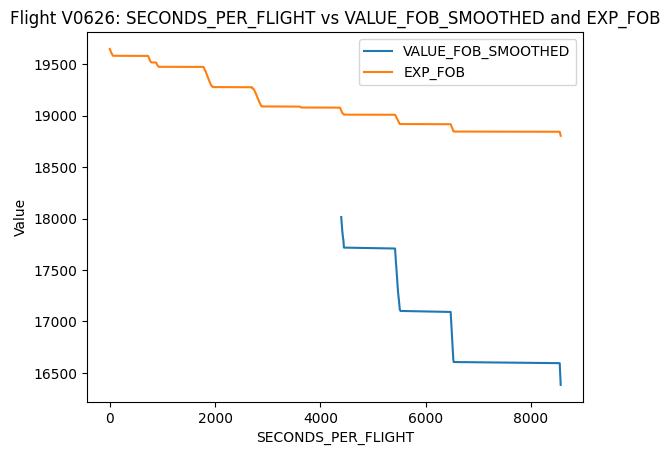

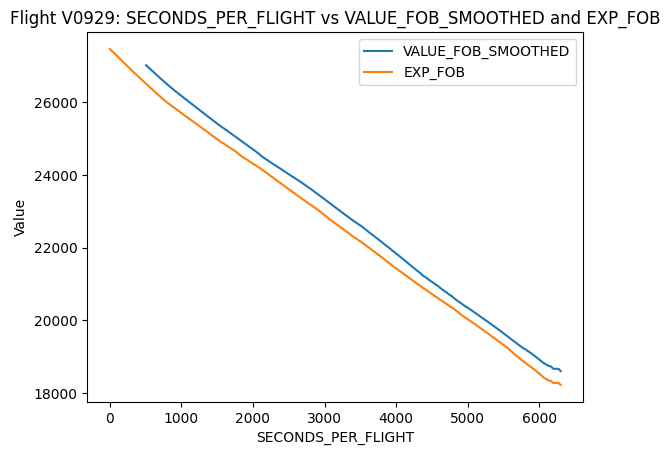

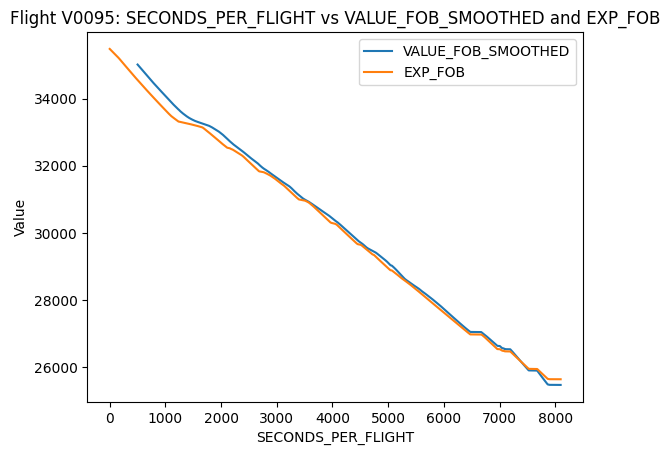

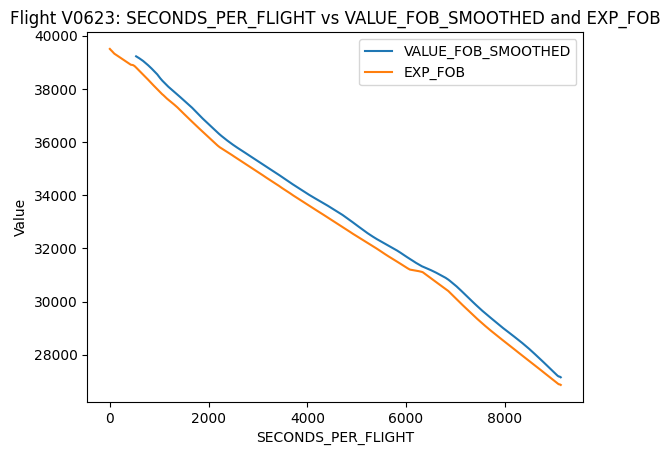

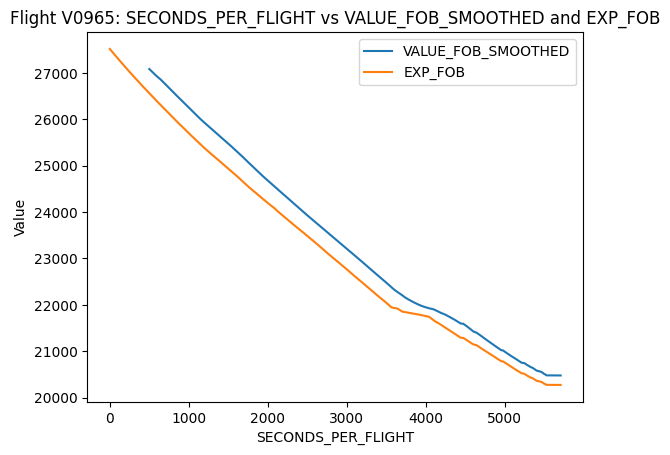

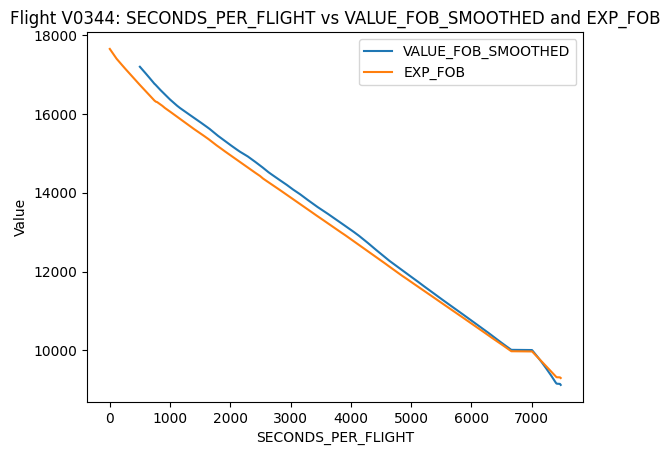

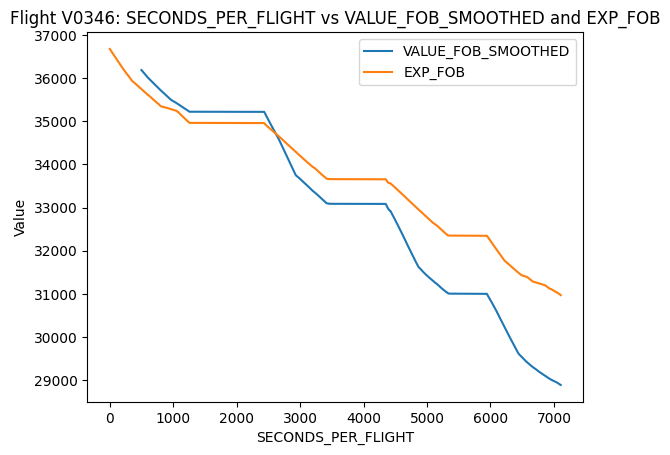

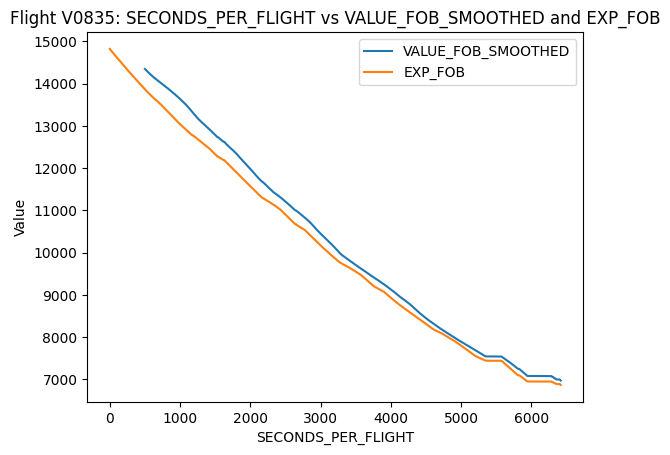

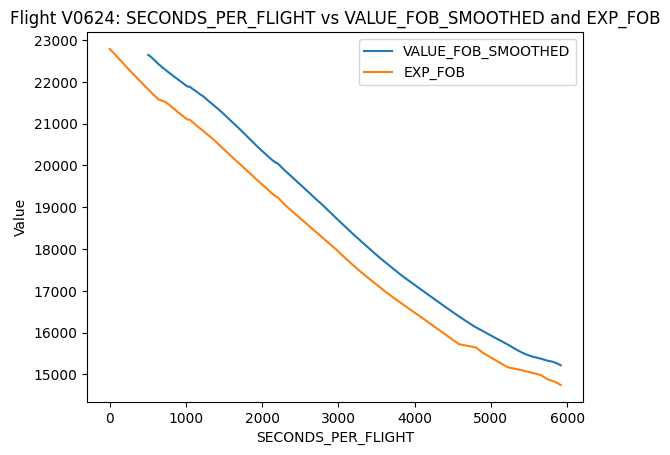

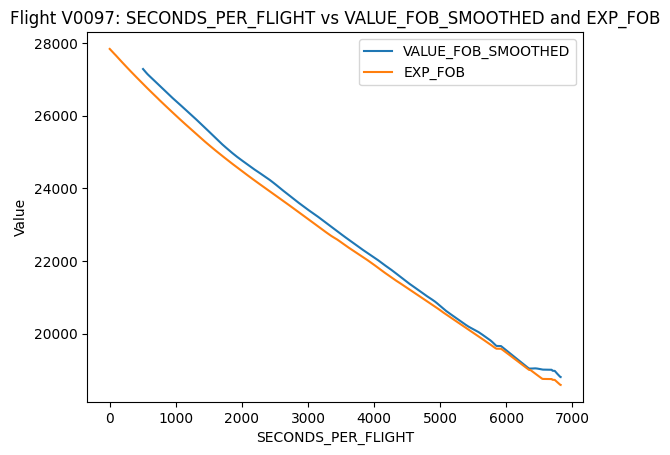

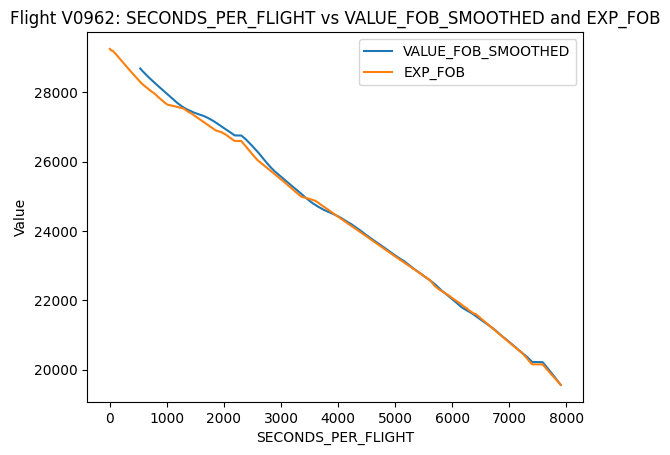

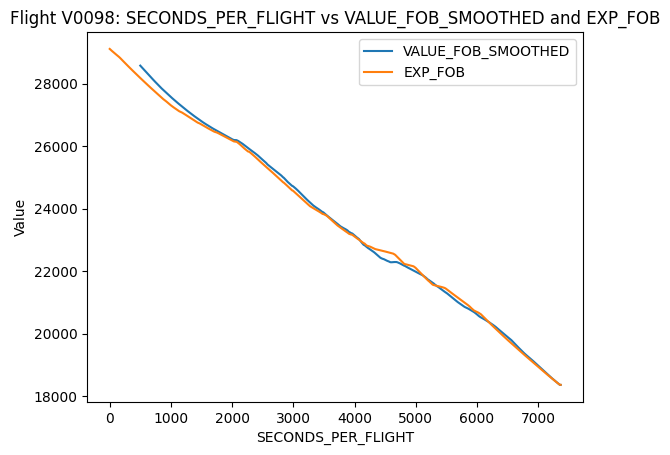

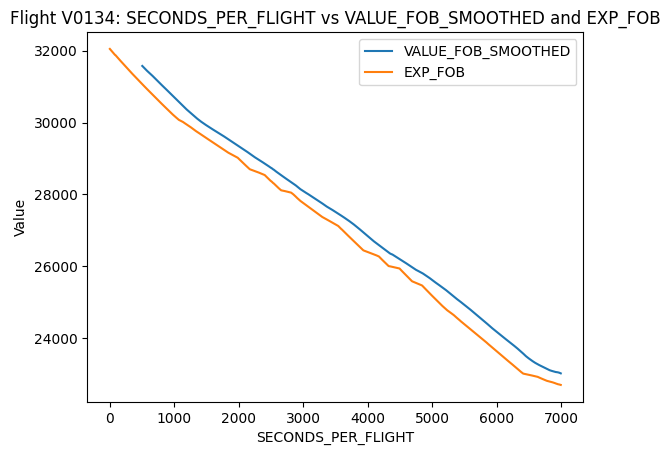

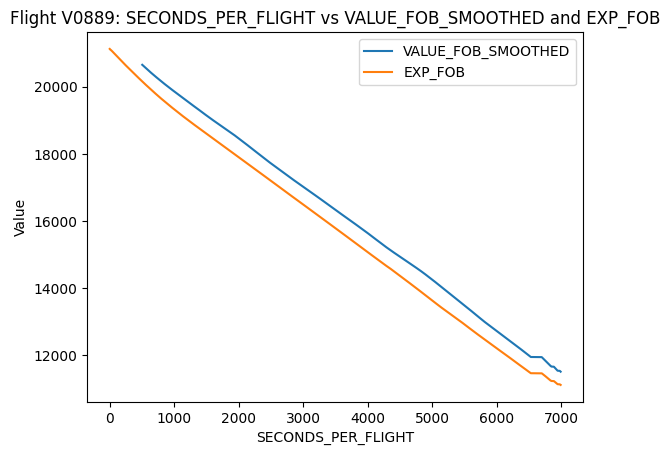

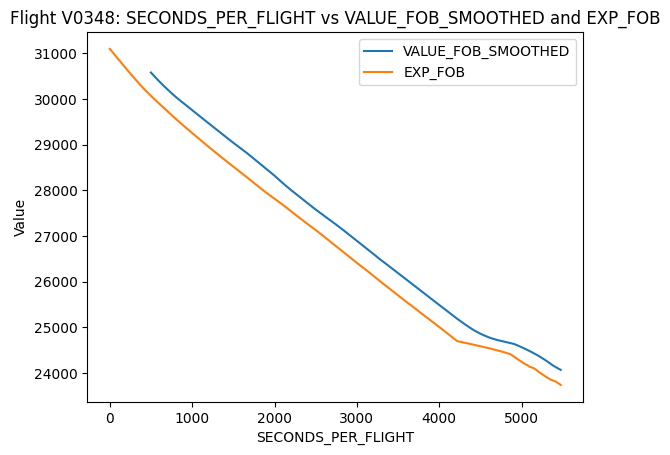

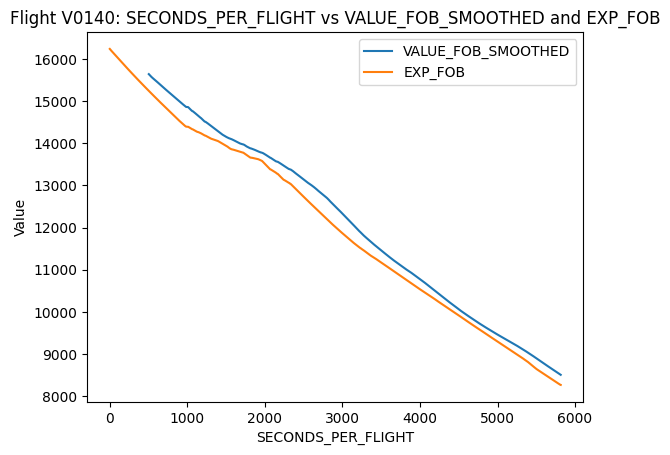

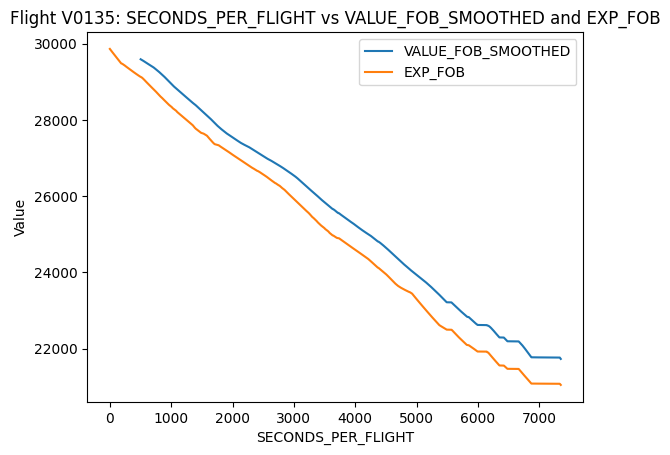

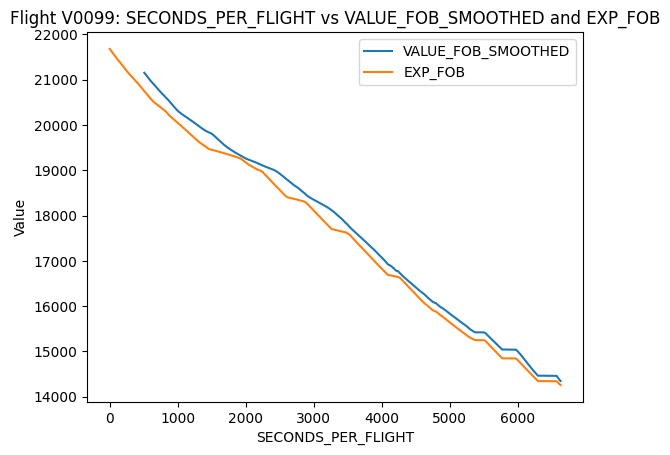

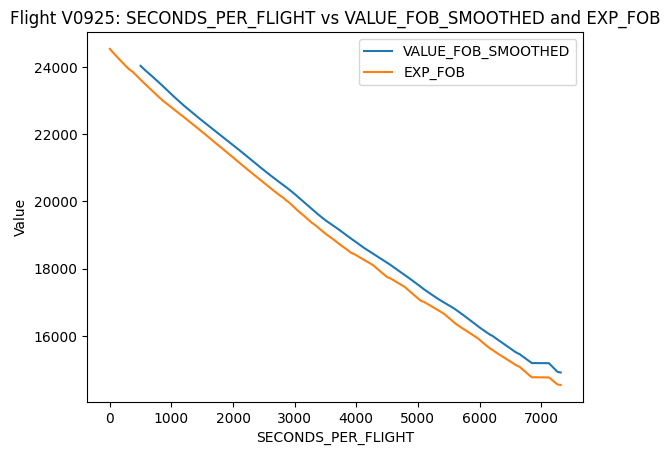

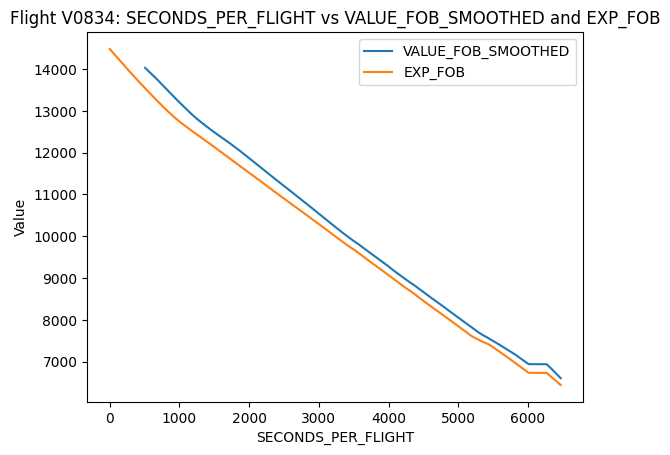

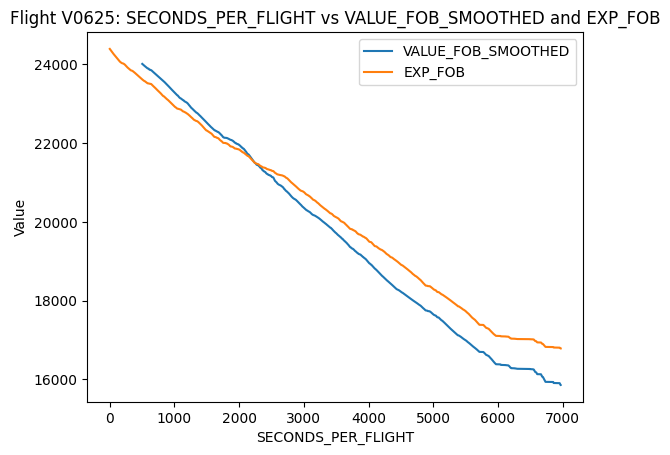

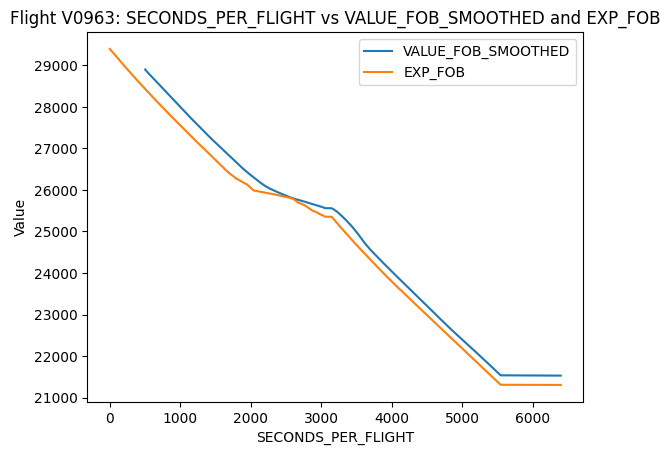

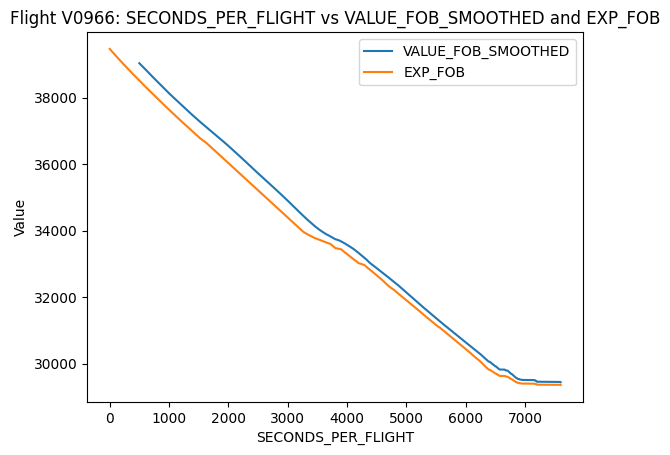

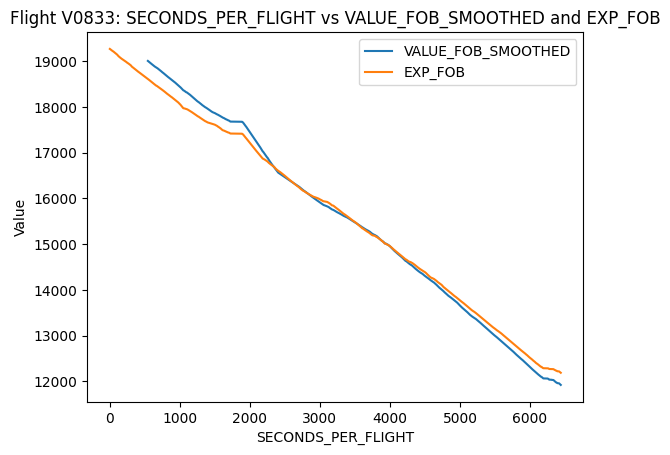

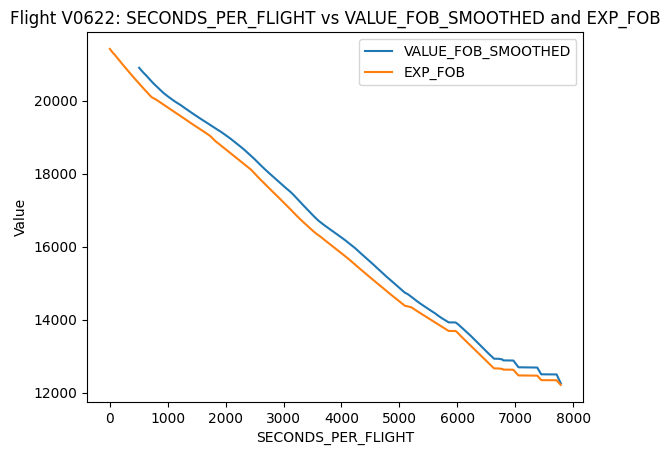

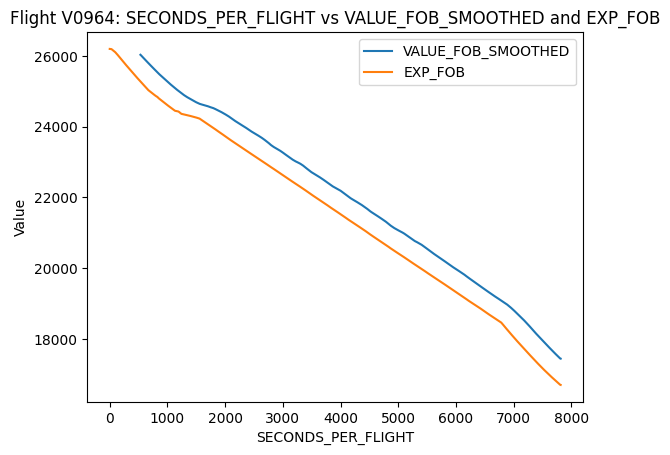

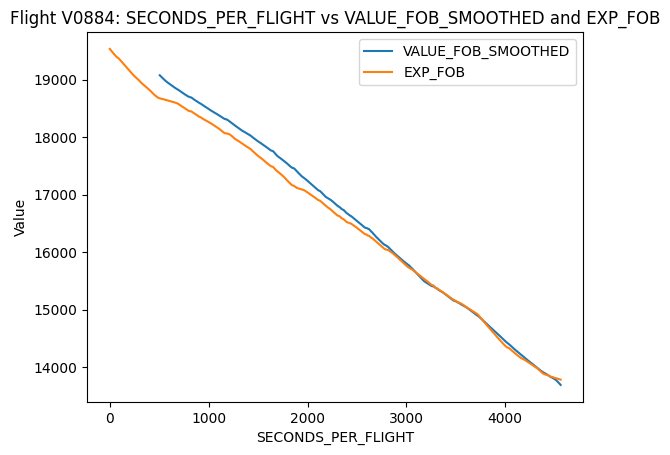

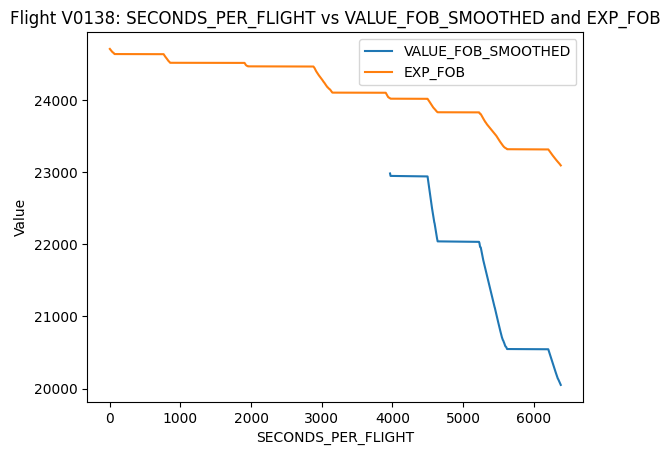

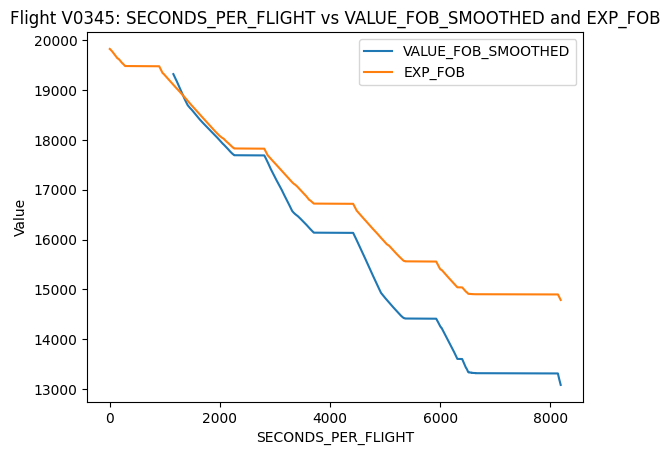

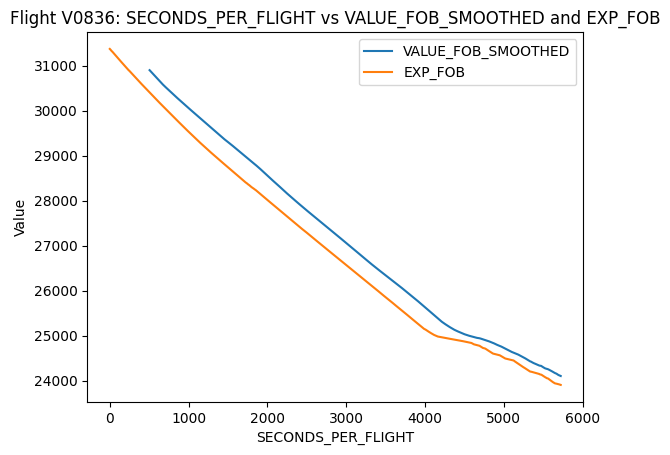

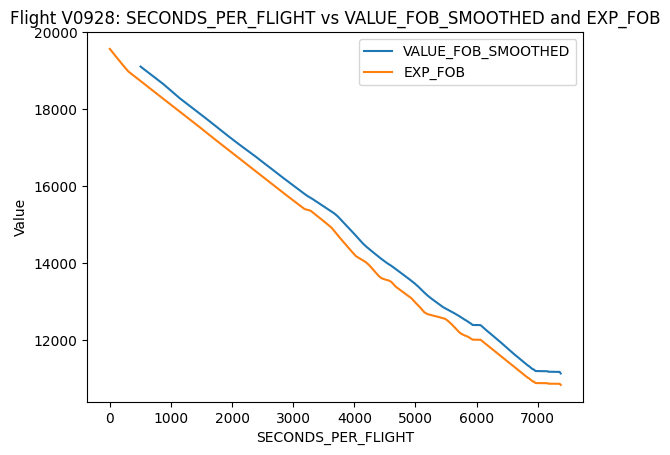

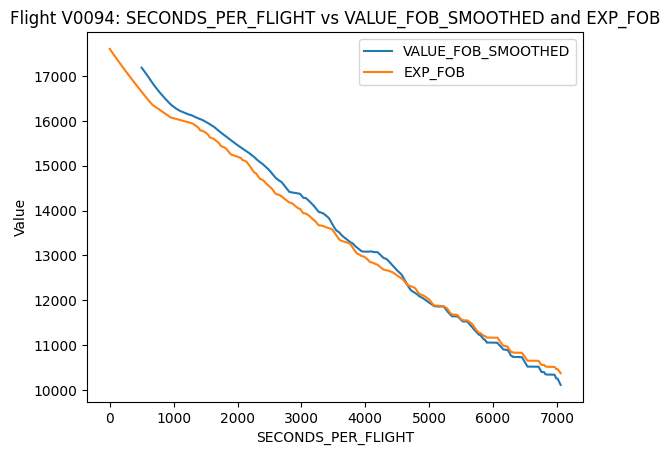

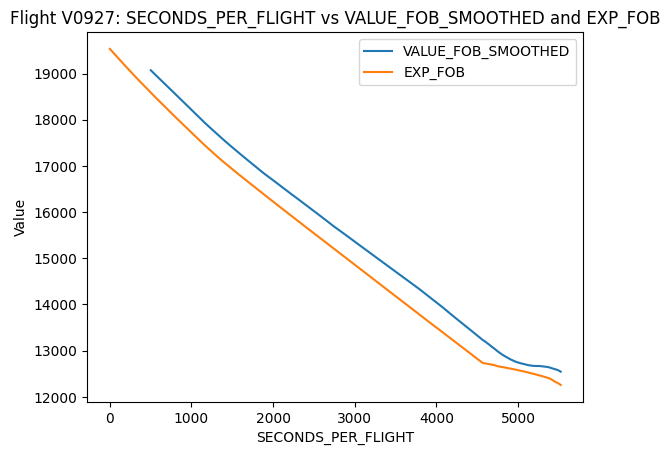

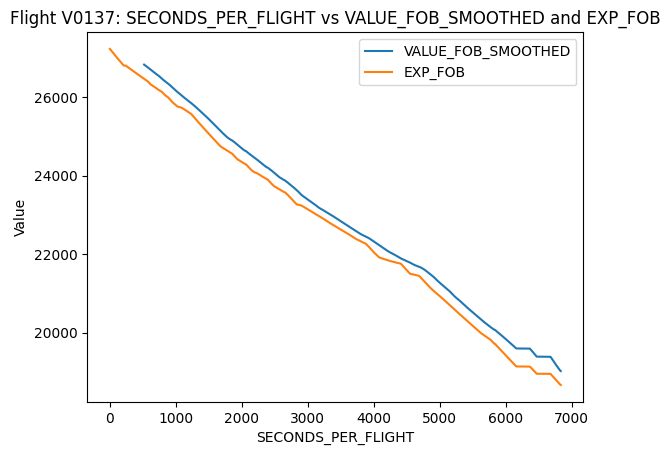

In [ ]:
for flight in flight_values:
    flight_data = msn_02_no_leak[msn_02_no_leak['Flight'] == flight]
    x = flight_data['SECONDS_PER_FLIGHT']
    y1 = flight_data['VALUE_FOB_SMOOTHED']
    y2 = flight_data['EXP_FOB']
    plt.plot(x, y1, label='VALUE_FOB_SMOOTHED')
    plt.plot(x, y2, label='EXP_FOB')
    plt.xlabel('SECONDS_PER_FLIGHT')
    plt.ylabel('Value')
    plt.title(f'Flight {flight}: SECONDS_PER_FLIGHT vs VALUE_FOB_SMOOTHED and EXP_FOB')
    plt.legend()
    plt.show()

This code creates separate visualizations comparing the actual smoothed fuel on board (VALUE_FOB_SMOOTHED) and the expected fuel on board (EXP_FOB) for each flight over time (SECONDS_PER_FLIGHT).

In [ ]:
msn_02_no_leak['LEAKEGE'] = 0
msn_02_no_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  cumsum_TOTAL_FUEL_USED_DIFF     EXP_FOB  \
0                             0.0                       0.0000  26046.0000   
1                             0.0                       2.0279  26043.9721   
2                             0.0                       4.1823  26041.8177   
3                             0.0                       6.2113  26039.7887   
4                             0.0                       8.4291  26037.5709   

   LEAKEGE  
0        0  
1        0  
2        0  
3        0  
4        0

Add a new column named 'LEAKEGE' to the DataFrame msn_02_no_leak and fills all the values in that new column with 0.

In [ ]:
msn_02_no_leak.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/msn_02_no_leak.csv', index=False)

Save the DataFrame msn_02_no_leak to a CSV file named 'msn_02_no_leak.csv'.

# **3. msn_02 leak**

In [ ]:
csv2_02 = '/content/drive/My Drive/Colab Notebooks/Capstone/MSN_02_cleaned.csv'
msn_02_leak = pd.read_csv(csv2_02, delimiter=',')

Read the data from the 'MSN_02_cleaned.csv' file and stores it in a Pandas DataFrame named msn_02_leak

In [ ]:
flight_values = msn_02_no_leak['Flight'].unique()
print(flight_values)

['V0136' 'V0133' 'V0926' 'V0837' 'V0626' 'V0929' 'V0095' 'V0623' 'V0965'
 'V0344' 'V0346' 'V0835' 'V0624' 'V0097' 'V0962' 'V0098' 'V0134' 'V0889'
 'V0348' 'V0140' 'V0135' 'V0099' 'V0925' 'V0834' 'V0625' 'V0963' 'V0966'
 'V0833' 'V0622' 'V0964' 'V0884' 'V0138' 'V0345' 'V0836' 'V0928' 'V0094'
 'V0927' 'V0137']


Extracts and displays all unique flight identifiers from the 'Flight' column in the Pandas DataFrame msn_02_no_leak

In [ ]:
msn_02_leak1= msn_02_leak[msn_02_leak['Flight'].isin(['V0136', 'V0133', 'V0926', 'V0837', 'V0626', 'V0929', 'V0095', 'V0622', 'V0964', 'V0884', 'V0138', 'V0345', 'V0836', 'V0623', 'V0965', 'V0344', 'V0346', 'V0835', 'V0624', 'V0097','V0925', 'V0834', 'V0625'])]
msn_02_leak2= msn_02_leak[msn_02_leak['Flight'].isin(['V0962',  'V0134', 'V0889', 'V0348', 'V0140', 'V0135', 'V0099' ,'V0132', 'V0927','V0928', 'V0137','V0833','V0098', 'V0963', 'V0966', 'V0094'])]
msn_02_leak3= msn_02_leak[msn_02_leak['Flight'].isin([])]

Dividing the original data (msn_02_leak) into three groups:

- msn_02_leak1: Flights with specific IDs (list 1).
- msn_02_leak2: Flights with specific IDs (list 2).
- msn_02_leak3: Flights that don't belong to either list 1 or list 2.

In [ ]:
msn_02_leak1['LEAKEGE_PER_SECOND'] = np.where(msn_02_leak1['VALUE_FOB_SMOOTHED_DIFF'] == 0, 0, 0.25)
msn_02_leak2['LEAKEGE_PER_SECOND'] = np.where(msn_02_leak2['VALUE_FOB_SMOOTHED_DIFF'] == 0, 0, 0.75)
msn_02_leak3['LEAKEGE_PER_SECOND'] = np.where(msn_02_leak3['VALUE_FOB_SMOOTHED_DIFF'] == 0, 0, 0.9)

<ipython-input-20-da23d7818702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn_02_leak1['LEAKEGE_PER_SECOND'] = np.where(msn_02_leak1['VALUE_FOB_SMOOTHED_DIFF'] == 0, 0, 0.25)
<ipython-input-20-da23d7818702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn_02_leak2['LEAKEGE_PER_SECOND'] = np.where(msn_02_leak2['VALUE_FOB_SMOOTHED_DIFF'] == 0, 0, 0.75)


This code assigns different leakage rates (potentially based on some logic or analysis) to flights in separate DataFrames depending on the difference in smoothed fuel on board (VALUE_FOB_SMOOTHED_DIFF).

In [ ]:
msn_02_leak = pd.concat([msn_02_leak1, msn_02_leak2, msn_02_leak3])
msn_02_leak

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  \
0       2011-03-09 12:44:19  V0136                 8.0    26046.0   
1       2011-03-09 12:44:20  V0136                 8.0    26042.0   
2       2011-03-09 12:44:21  V0136                 8.0    26038.0   
3       2011-03-09 12:44:22  V0136                 8.0    26032.0   
4       2011-03-09 12:44:23  V0136                 8.0    26029.0   
...                     ...    ...                 ...        ...   
224057  2011-03-10 14:44:03  V0137                 8.0    18401.0   
224058  2011-03-10 14:44:05  V0137                 8.0    18403.0   
224059  2011-03-10 14:44:06  V0137                 8.0    18400.0   
224060  2011-03-10 14:44:08  V0137                 8.0    18398.0   
224061  2011-03-10 14:44:11  V0137                 8.0    18393.0   

        FW_GEO_ALTITUDE  ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0              1847.500               1         908.3574                 0.0   
1              1866.875               1         910.3853                 1.0   
2              1886.375               1         912.5397                 2.0   
3              1906.000               1         914.5687                 3.0   
4              1925.750               1         916.7865                 4.0   
...                 ...             ...              ...                 ...   
224057        13084.130               1        9762.1010              6824.0   
224058        13140.380               1        9765.7020              6826.0   
224059        13168.630               1        9767.6410              6827.0   
224060        13225.130               1        9771.4090              6829.0   
224061        13308.880               1        9776.8890              6832.0   

        TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                        14048.0             0.0                0.0000   
1                        14048.0             4.0                2.0279   
2                        14048.0             4.0                2.1544   
3                        14048.0             6.0                2.0290   
4                        14048.0             3.0                2.2178   
...                          ...             ...                   ...   
224057                   16002.0             2.0                1.8300   
224058                   16002.0             1.0                1.7740   
224059                   16002.0             3.0                1.9390   
224060                   16002.0             1.0                1.8850   
224061                   16002.0             3.0                1.8830   

        FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0          1901.16075        1                 NaN                    0.000   
1          1899.87075        1                 NaN                    0.000   
2          1901.43475        1                 NaN                    0.000   
3          1902.22875        1                 NaN                    0.000   
4          1900.75175        1                 NaN                    0.000   
...               ...      ...                 ...                      ...   
224057     1662.75375        1           19033.806                    2.386   
224058     1662.64700        1           19031.418                    2.388   
224059     1662.62850        1           19029.026                    2.392   
224060     1662.63700        1           19026.642                    2.384   
224061     1663.56750        1           19024.254                    2.388   

        cumsum_VALUE_FOB_SMOOTHED_DIFF  LEAKEGE_PER_SECOND  
0                                0.000                0.00  
1                                0.000                0.00  
2                                0.000                0.00  
3                                0.000                0.00  
4                                0.000                0.00  
...                      

The code you provided combines the three DataFrames (msn_02_leak1, msn_02_leak2, and msn_02_leak3) into a single DataFrame named msn_02_leak

In [ ]:
msn_02_leak['TOTAL_FUEL_USED_DIFF_LEAK'] = msn_02_leak['TOTAL_FUEL_USED_DIFF'] + msn_02_leak['LEAKEGE_PER_SECOND']

Adds a new column named 'TOTAL_FUEL_USED_DIFF_LEAK' to the DataFrame msn_02_leak. The new column calculates the total fuel used considering potential leakage.

In [ ]:
msn_02_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  LEAKEGE_PER_SECOND  \
0                             0.0                 0.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             0.0                 0.0   
4                             0.0                 0.0   

   TOTAL_FUEL_USED_DIFF_LEAK  
0                     0.0000  
1                     2.0279  
2                     2.1544  
3                     2.0290  
4                     2.2178

Display the first few rows of the final DataFrame msn_02_leak

In [ ]:
msn_02_leak['cumsum_TOTAL_FUEL_USED_DIFF_LEAK'] = msn_02_leak.groupby('Flight')['TOTAL_FUEL_USED_DIFF_LEAK'].cumsum()
msn_02_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  LEAKEGE_PER_SECOND  \
0                             0.0                 0.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             0.0                 0.0   
4                             0.0                 0.0   

   TOTAL_FUEL_USED_DIFF_LEAK  cumsum_TOTAL_FUEL_USED_DIFF_LEAK  
0                     0.0000                            0.0000  
1                     2.0279                            2.0279  
2                     2.1544                            4.1823  
3                     2.0290                            6.2113  
4                     2.2178                            8.4291

This code snippet calculates the cumulative sum of the 'TOTAL_FUEL_USED_DIFF_LEAK' for each flight within the DataFrame msn_02_leak

In [ ]:
msn_02_leak['EXP_FOB'] = msn_02_leak.groupby('Flight')['VALUE_FOB'].transform('first') - msn_02_leak['cumsum_TOTAL_FUEL_USED_DIFF_LEAK']
msn_02_leak.head()

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  FW_GEO_ALTITUDE  \
0  2011-03-09 12:44:19  V0136                 8.0    26046.0         1847.500   
1  2011-03-09 12:44:20  V0136                 8.0    26042.0         1866.875   
2  2011-03-09 12:44:21  V0136                 8.0    26038.0         1886.375   
3  2011-03-09 12:44:22  V0136                 8.0    26032.0         1906.000   
4  2011-03-09 12:44:23  V0136                 8.0    26029.0         1925.750   

   ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0               1         908.3574                 0.0   
1               1         910.3853                 1.0   
2               1         912.5397                 2.0   
3               1         914.5687                 3.0   
4               1         916.7865                 4.0   

   TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  TOTAL_FUEL_USED_DIFF  \
0                   14048.0             0.0                0.0000   
1                   14048.0             4.0                2.0279   
2                   14048.0             4.0                2.1544   
3                   14048.0             6.0                2.0290   
4                   14048.0             3.0                2.2178   

   FUEL_FLOW_AVE  Cluster  VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0     1901.16075        1                 NaN                      0.0   
1     1899.87075        1                 NaN                      0.0   
2     1901.43475        1                 NaN                      0.0   
3     1902.22875        1                 NaN                      0.0   
4     1900.75175        1                 NaN                      0.0   

   cumsum_VALUE_FOB_SMOOTHED_DIFF  LEAKEGE_PER_SECOND  \
0                             0.0                 0.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             0.0                 0.0   
4                             0.0                 0.0   

   TOTAL_FUEL_USED_DIFF_LEAK  cumsum_TOTAL_FUEL_USED_DIFF_LEAK     EXP_FOB  
0                     0.0000                            0.0000  26046.0000  
1                     2.0279                            2.0279  26043.9721  
2                     2.1544                            4.1823  26041.8177  
3                     2.0290                            6.2113  26039.7887  
4                     2.2178                            8.4291  26037.5709

This code calculates the expected fuel on board (EXP_FOB) for each data point within a flight, considering the leakage you previously modeled.

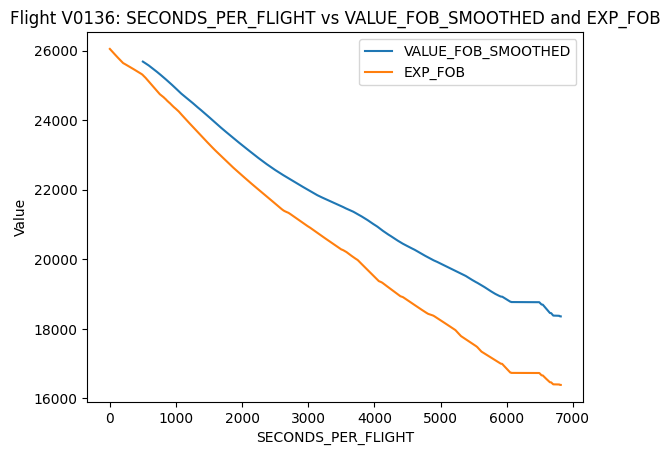

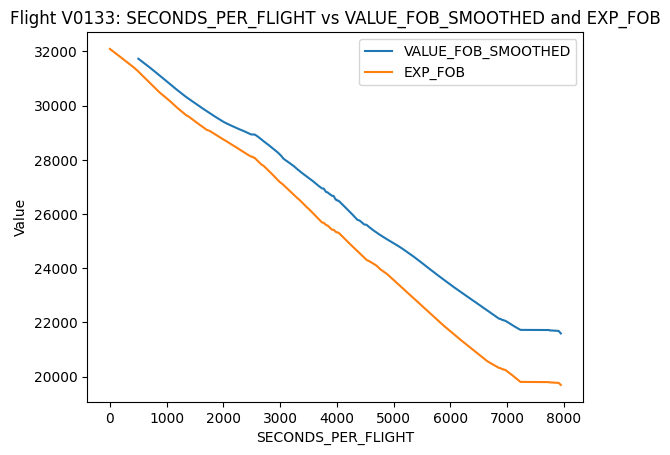

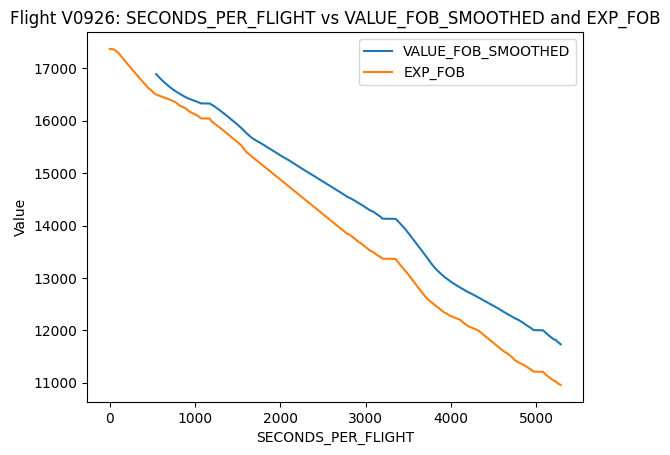

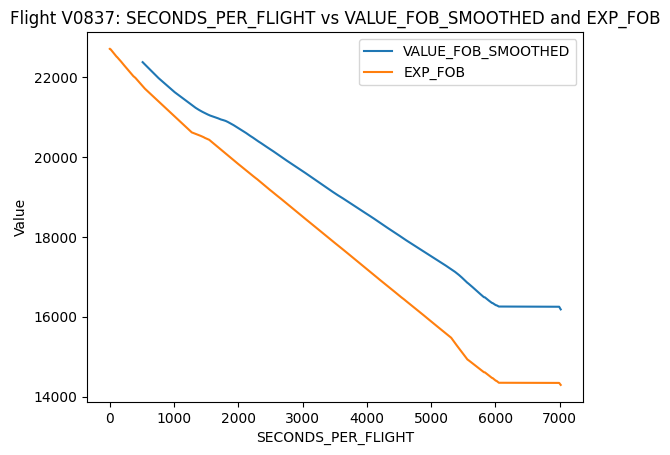

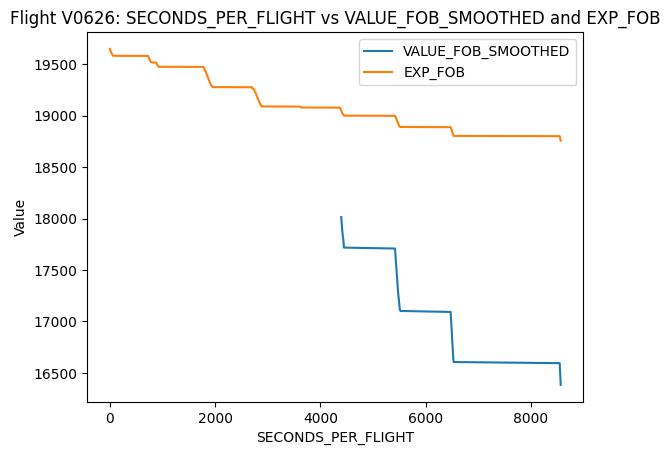

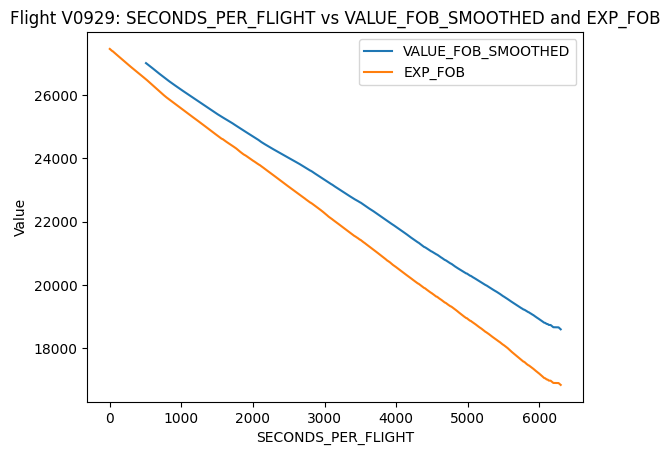

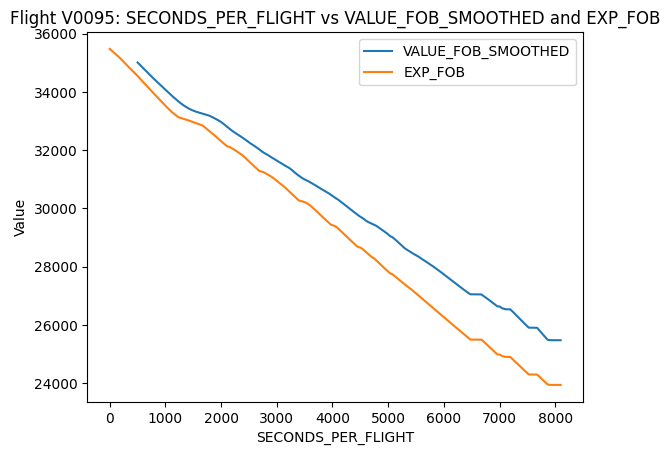

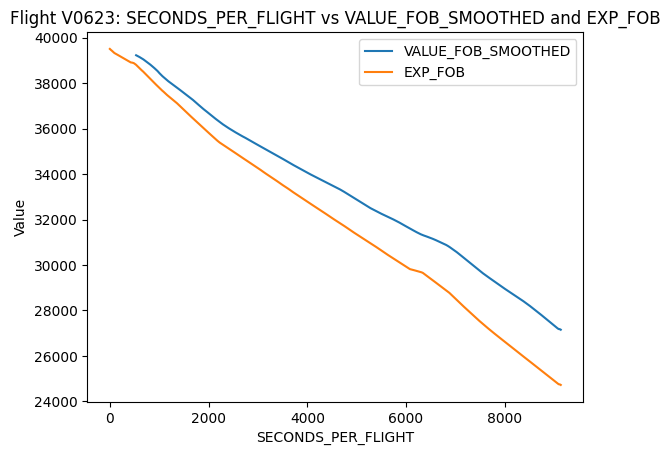

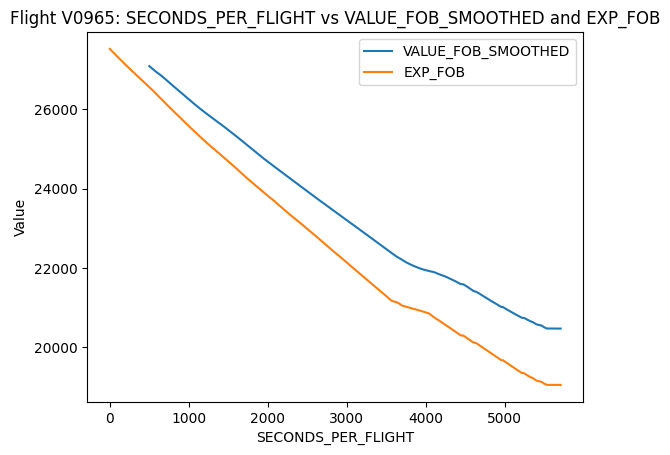

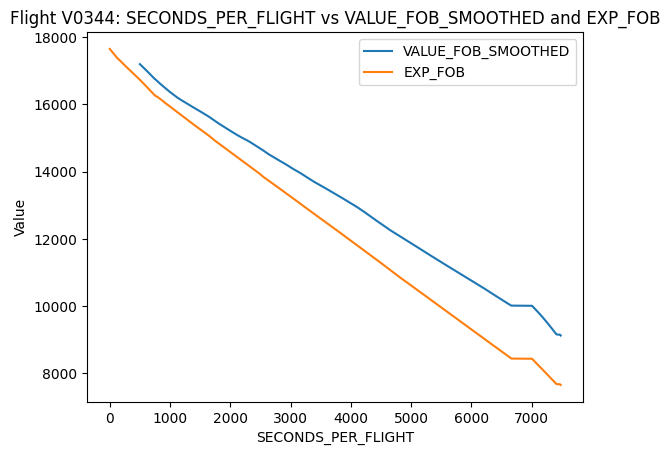

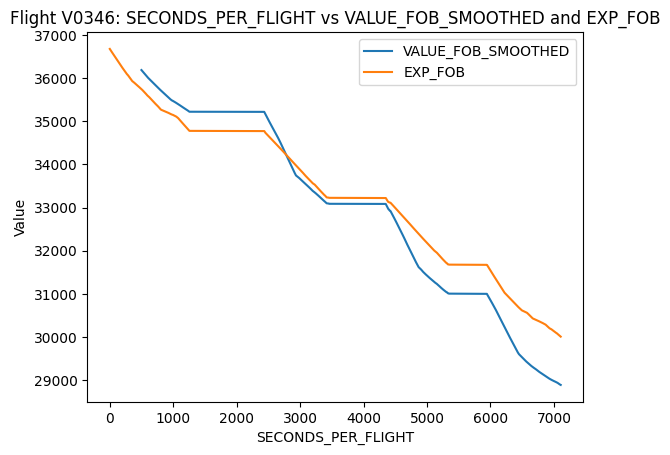

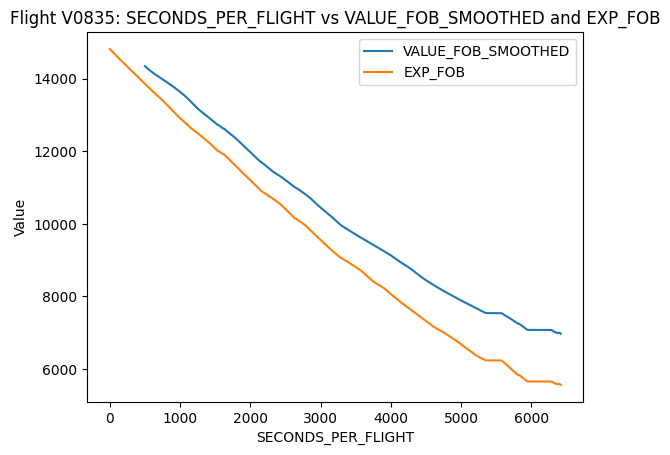

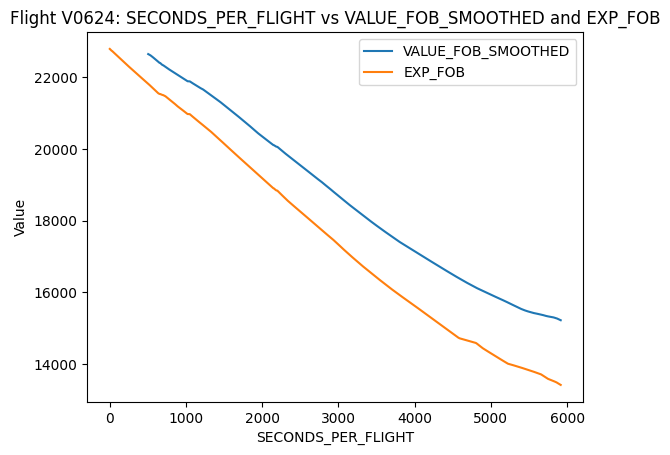

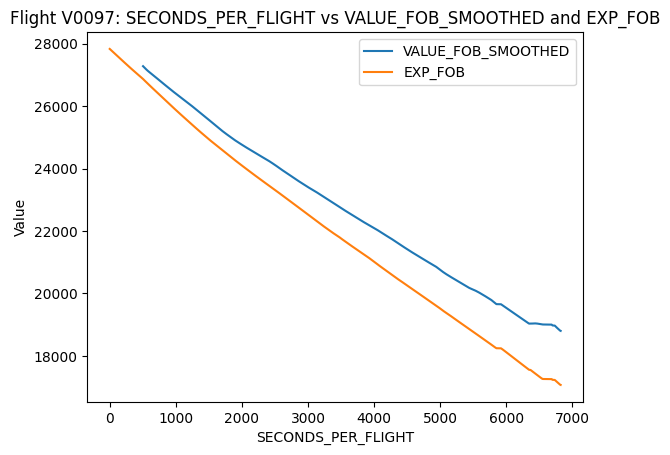

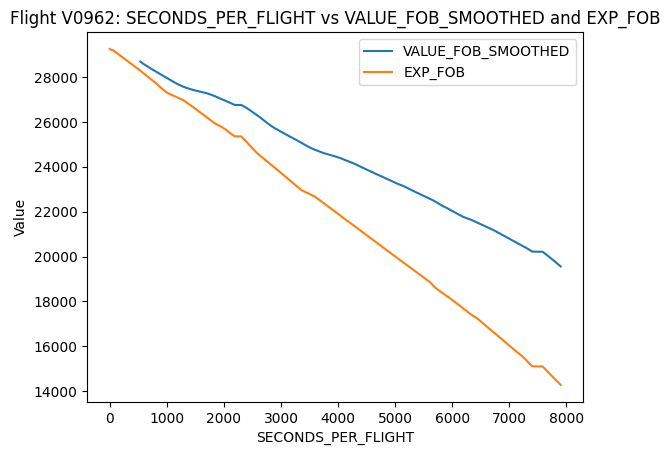

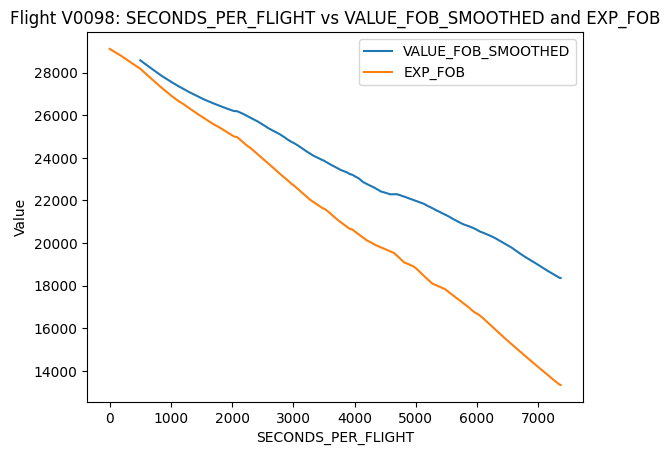

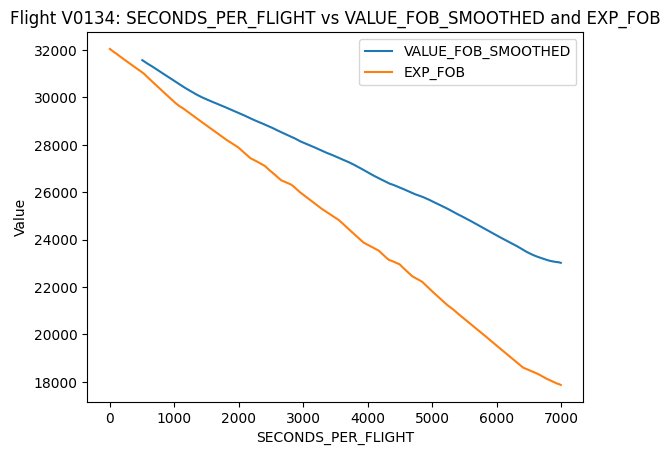

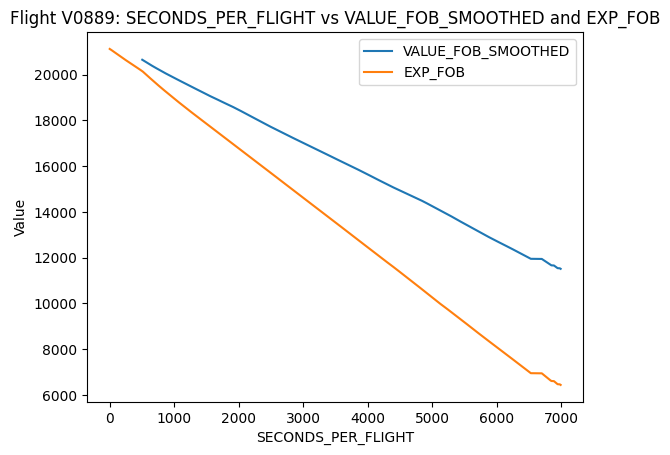

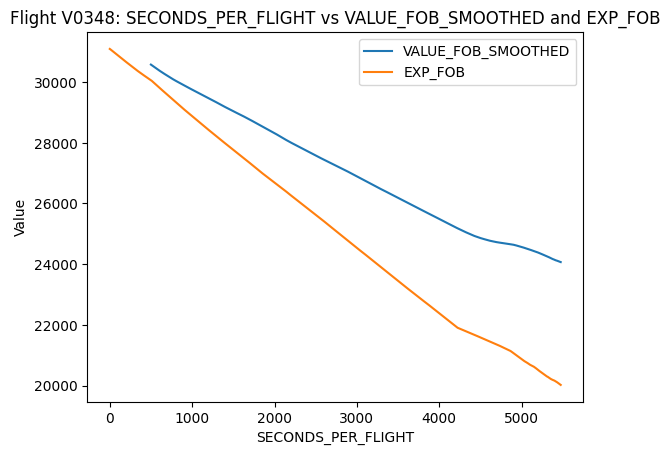

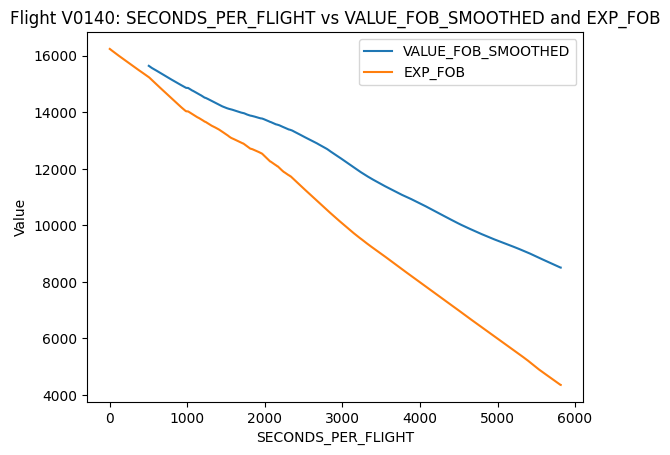

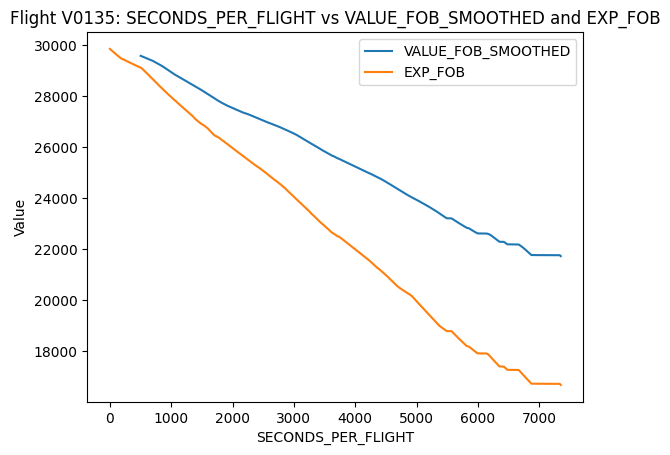

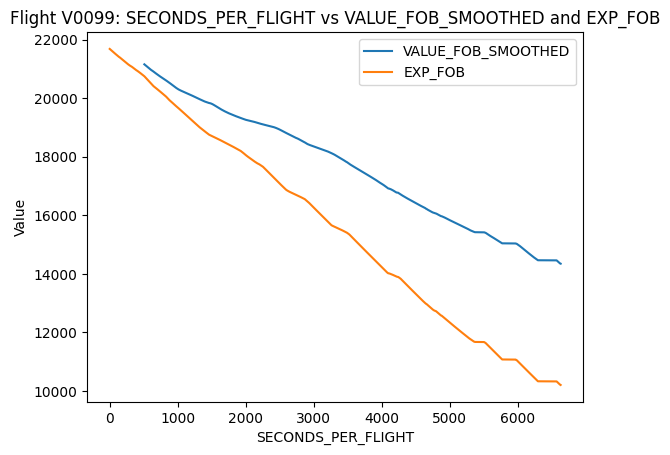

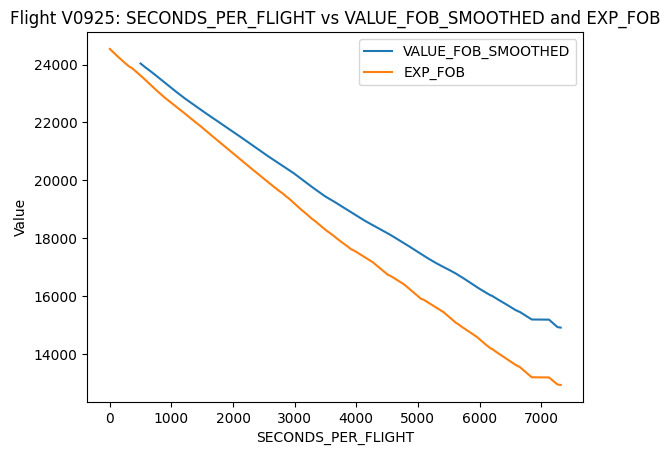

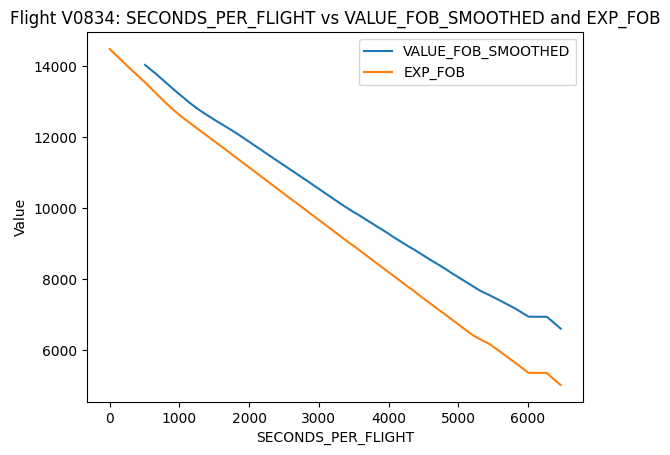

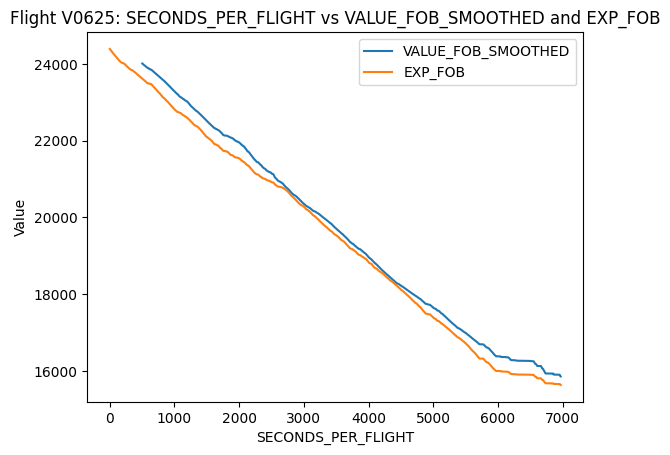

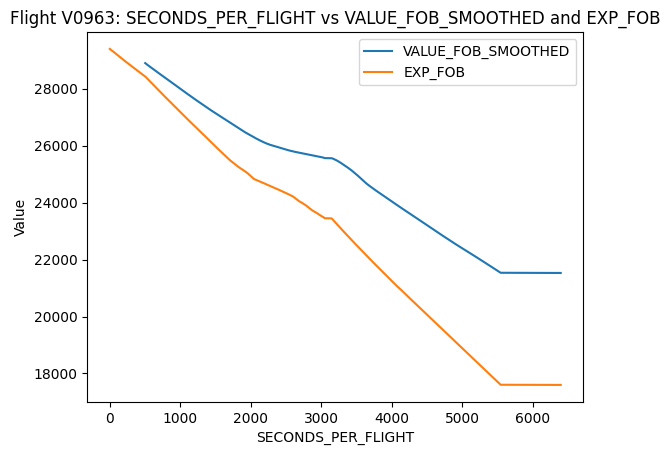

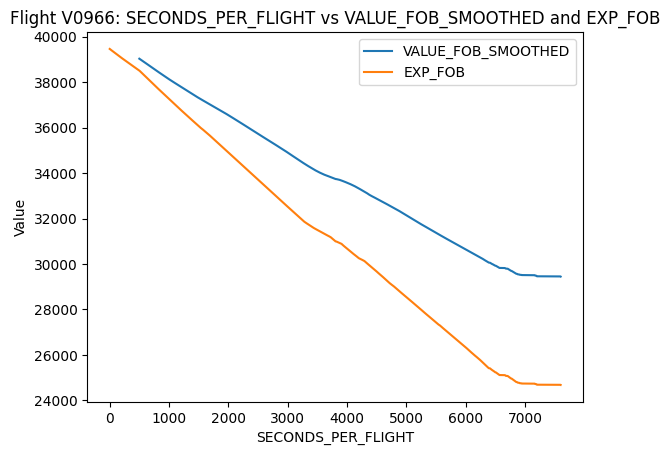

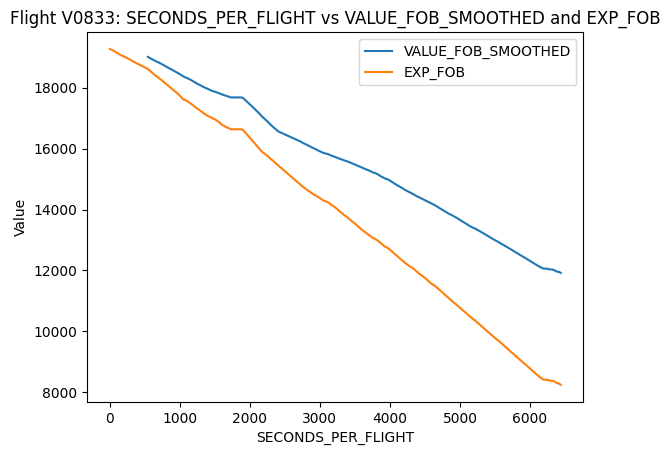

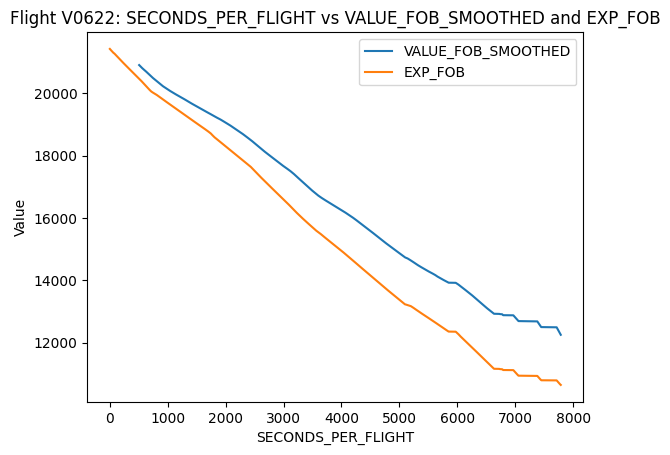

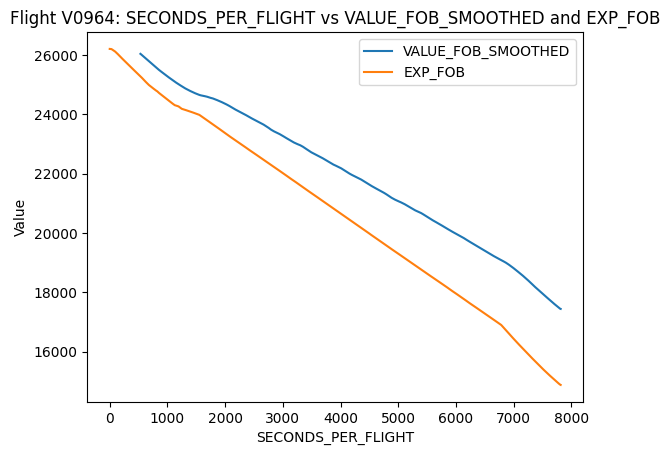

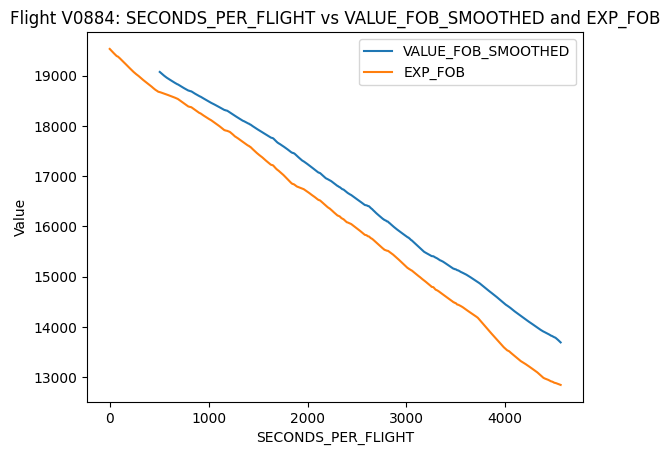

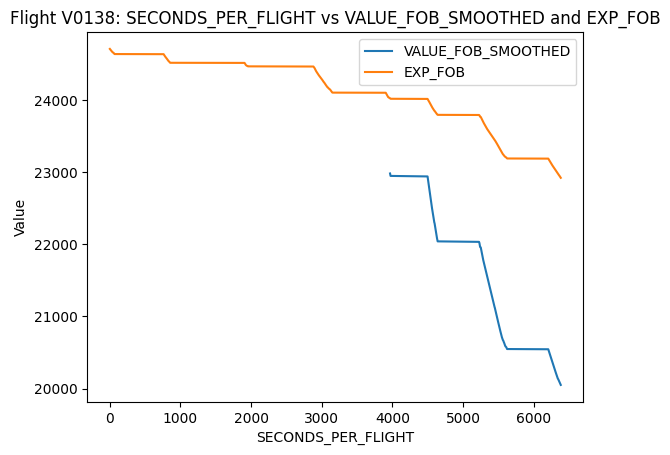

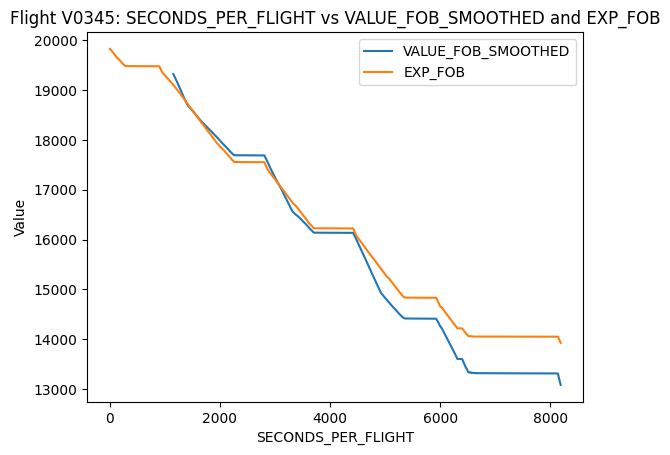

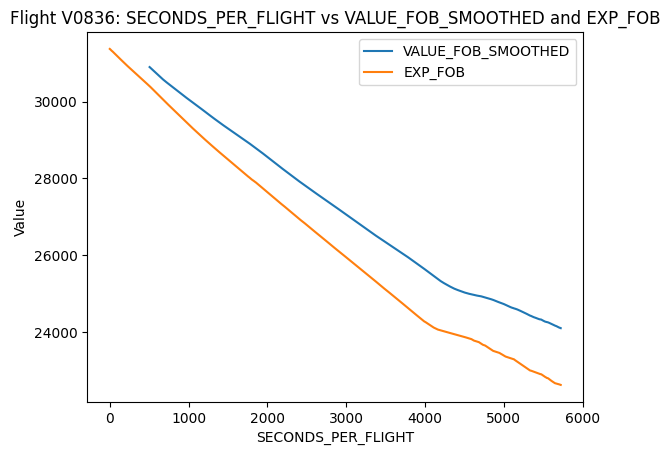

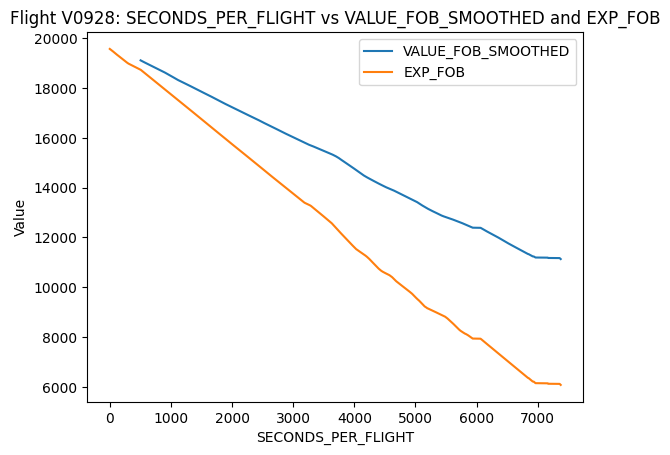

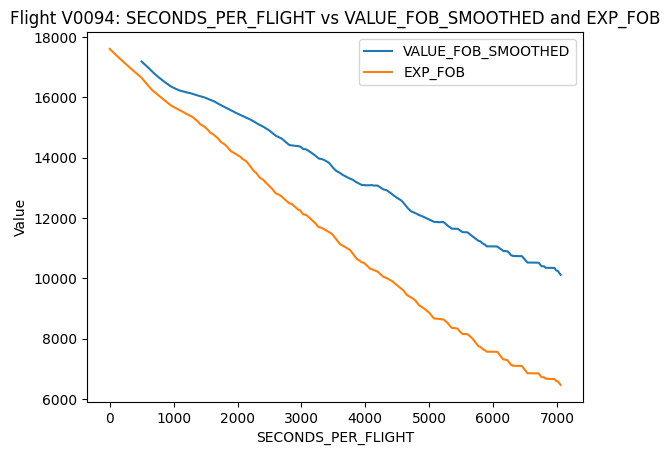

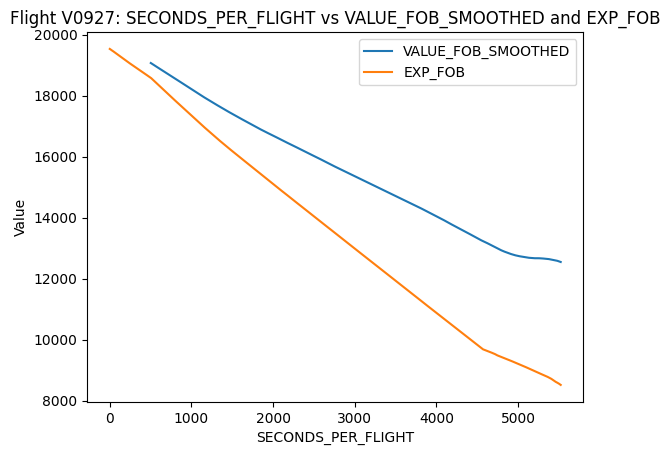

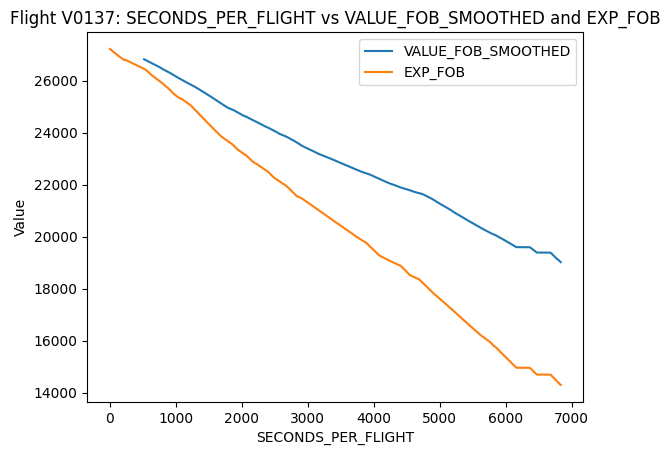

In [ ]:
for flight in flight_values:
    flight_data = msn_02_leak[msn_02_leak['Flight'] == flight]
    x = flight_data['SECONDS_PER_FLIGHT']
    y1 = flight_data['VALUE_FOB_SMOOTHED']
    y2 = flight_data['EXP_FOB']
    plt.plot(x, y1, label='VALUE_FOB_SMOOTHED')
    plt.plot(x, y2, label='EXP_FOB')
    plt.xlabel('SECONDS_PER_FLIGHT')
    plt.ylabel('Value')
    plt.title(f'Flight {flight}: SECONDS_PER_FLIGHT vs VALUE_FOB_SMOOTHED and EXP_FOB')
    plt.legend()
    plt.show()

Creates separate visualizations comparing the actual smoothed fuel on board (VALUE_FOB_SMOOTHED) and the expected fuel on board (EXP_FOB) for each flight over time (SECONDS_PER_FLIGHT).

In [ ]:
msn_02_leak['LEAKEGE'] = 1
msn_02_leak

UTC_TIME Flight  FLIGHT_PHASE_COUNT  VALUE_FOB  \
0       2011-03-09 12:44:19  V0136                 8.0    26046.0   
1       2011-03-09 12:44:20  V0136                 8.0    26042.0   
2       2011-03-09 12:44:21  V0136                 8.0    26038.0   
3       2011-03-09 12:44:22  V0136                 8.0    26032.0   
4       2011-03-09 12:44:23  V0136                 8.0    26029.0   
...                     ...    ...                 ...        ...   
224057  2011-03-10 14:44:03  V0137                 8.0    18401.0   
224058  2011-03-10 14:44:05  V0137                 8.0    18403.0   
224059  2011-03-10 14:44:06  V0137                 8.0    18400.0   
224060  2011-03-10 14:44:08  V0137                 8.0    18398.0   
224061  2011-03-10 14:44:11  V0137                 8.0    18393.0   

        FW_GEO_ALTITUDE  ENGINE_RUNNING  TOTAL_FUEL_USED  SECONDS_PER_FLIGHT  \
0              1847.500               1         908.3574                 0.0   
1              1866.875               1         910.3853                 1.0   
2              1886.375               1         912.5397                 2.0   
3              1906.000               1         914.5687                 3.0   
4              1925.750               1         916.7865                 4.0   
...                 ...             ...              ...                 ...   
224057        13084.130               1        9762.1010              6824.0   
224058        13140.380               1        9765.7020              6826.0   
224059        13168.630               1        9767.6410              6827.0   
224060        13225.130               1        9771.4090              6829.0   
224061        13308.880               1        9776.8890              6832.0   

        TOTAL_SECONDS_PER_FLIGHT  VALUE_FOB_DIFF  ...  FUEL_FLOW_AVE  Cluster  \
0                        14048.0             0.0  ...     1901.16075        1   
1                        14048.0             4.0  ...     1899.87075        1   
2                        14048.0             4.0  ...     1901.43475        1   
3                        14048.0             6.0  ...     1902.22875        1   
4                        14048.0             3.0  ...     1900.75175        1   
...                          ...             ...  ...            ...      ...   
224057                   16002.0             2.0  ...     1662.75375        1   
224058                   16002.0             1.0  ...     1662.64700        1   
224059                   16002.0             3.0  ...     1662.62850        1   
224060                   16002.0             1.0  ...     1662.63700        1   
224061                   16002.0             3.0  ...     1663.56750        1   

        VALUE_FOB_SMOOTHED  VALUE_FOB_SMOOTHED_DIFF  \
0                      NaN                    0.000   
1                      NaN                    0.000   
2                      NaN                    0.000   
3                      NaN                    0.000   
4                      NaN                    0.000   
...                    ...                      ...   
224057           19033.806                    2.386   
224058           19031.418                    2.388   
224059           19029.026                    2.392   
224060           19026.642                    2.384   
224061           19024.254                    2.388   

        cumsum_VALUE_FOB_SMOOTHED_DIFF  LEAKEGE_PER_SECOND  \
0                                0.000                0.00   
1                                0.000                0.00   
2                                0.000                0.00   
3                                0.000                0.00   
4                                0.000                0.00   
...                                ...                 ...   
224057                        7792.964                0.75   
224058                        7795.352                0.75   
224059                        7797.74


The code msn_02_leak['LEAKEGE'] = 1 assigns the value 1 to all elements in the 'LEAKEGE' column of the DataFrame msn_02_leak.

In [ ]:
msn_02_leak.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/msn_02_leak.csv', index=False)

saves the modified DataFrame msn_02_leak to a CSV file named 'msn_02_leak.csv'.